***
# <font color=lightblue size=10>Overfitting e UnderFitting</font>
***

O **objetivo de um modelo de aprendizado de máquina** é aprender padrões gerais a partir dos dados de treino, de forma que consiga **generalizar bem** para novos dados (teste/validação).  
Porém, isso nem sempre acontece — e dois problemas comuns surgem: **underfitting** e **overfitting**.

---

## Underfitting (Subajuste)

Ocorre quando o modelo **não tem capacidade suficiente** para aprender os padrões dos dados.  
Ele é **muito simples** e não consegue capturar a complexidade da relação entre as variáveis.

- **Características:**
  - Erro de treino **alto**.
  - Erro de teste também **alto**.
  - Modelo “cego” para os padrões reais.

- **Exemplo:**  
  Usar uma **reta (polinômio grau 1)** para aproximar uma curva senoidal.

O modelo não explica bem nem os dados de treino, nem os de teste.

---

## Bom Ajuste (Generalização)

Ocorre quando o modelo encontra um **equilíbrio entre simplicidade e complexidade**.  
Ele aprende os padrões principais nos dados de treino, mas também **generaliza bem** para dados novos.

- **Características:**
  - Erro de treino **baixo**.
  - Erro de teste também **baixo**.
  - Modelo captura a tendência sem se prender demais ao ruído.

- **Exemplo:**  
  Um polinômio de **grau intermediário** que segue bem a forma da curva, sem oscilações excessivas.

✅ Este é o cenário desejado.

---

## Overfitting (Sobreajuste)

Ocorre quando o modelo é **complexo demais** e acaba aprendendo não só os padrões reais, mas também o **ruído e variações aleatórias** dos dados de treino.  
Com isso, ele tem excelente desempenho no treino, mas **fracassa nos dados de teste**.

- **Características:**
  - Erro de treino **muito baixo** (quase zero).
  - Erro de teste **alto**.
  - Modelo “decora” os dados em vez de generalizar.

- **Exemplo:**  
  Um polinômio de grau muito alto que passa por quase todos os pontos de treino, mas oscila fortemente fora dele.

🚨 O modelo parece “perfeito” no treino, mas não funciona bem no mundo real.

---

## Resumo Visual

| Situação        | Erro Treino | Erro Teste | Complexidade |
|-----------------|-------------|------------|--------------|
| Underfitting    | Alto        | Alto       | Baixa        |
| Bom Ajuste      | Baixo       | Baixo      | Moderada     |
| Overfitting     | Muito Baixo | Alto       | Alta         |

---

## Como evitar o overfitting
- Usar **mais dados** de treino.  
- Aplicar **regularização** (ex.: L1, L2, dropout).  
- Reduzir a **complexidade do modelo**.  
- Usar **validação cruzada** para monitorar a generalização.  
- Parar o treino cedo (**early stopping**) se a validação começar a piorar.

---


# Importando Bibliotecas

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from ipywidgets import interact
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification

# Exemplo com Regressão Linear


Este exemplo mostra como diferentes graus de polinômio podem levar a **underfitting**, **bom ajuste** e **overfitting** em um conjunto de dados sintético.

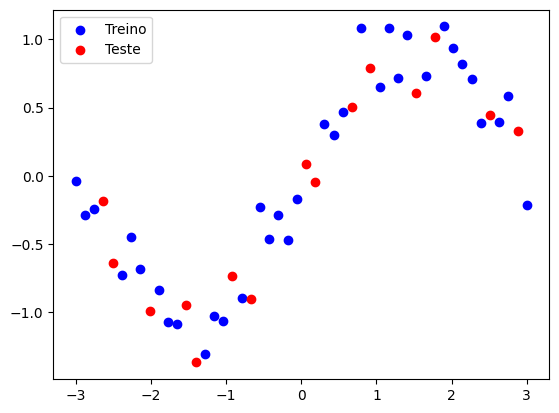

In [10]:
# Criando Dataset
np.random.seed(42)
X = np.linspace(-3, 3, 50)
y = np.sin(X) + np.random.normal(0, 0.2, len(X))

X = X.reshape(-1, 1)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X_train, y_train, label="Treino", color="blue")
plt.scatter(X_test, y_test, label="Teste", color="red")
plt.legend()
plt.show()


O dataset é dividido em 70% para treino e 30% para teste.
O gráfico mostra em azul os pontos de treino e em vermelho os de teste.

Agora, tente, no exercício abaixo, aumentar ou diminuir os graus do polinômio e veja como nossa função de predição se comporta.

In [11]:
def plot_model(degree):
    # Transformação polinomial
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Regressão
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predições
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(X_plot))
    
    # Avaliação
    train_error = mean_squared_error(y_train, model.predict(X_train_poly))
    test_error = mean_squared_error(y_test, model.predict(X_test_poly))
    
    # Plot
    plt.scatter(X_train, y_train, label="Treino", color="blue")
    plt.scatter(X_test, y_test, label="Teste", color="red")
    plt.plot(X_plot, y_plot, color="black", label=f"Modelo grau {degree}")
    plt.title(f"Grau {degree} | Erro Treino: {train_error:.2f} | Erro Teste: {test_error:.2f}")
    plt.legend()
    plt.show()

# Slider interativo
interact(plot_model, degree=(1, 25, 1))


interactive(children=(IntSlider(value=13, description='degree', max=25, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_model(degree)>

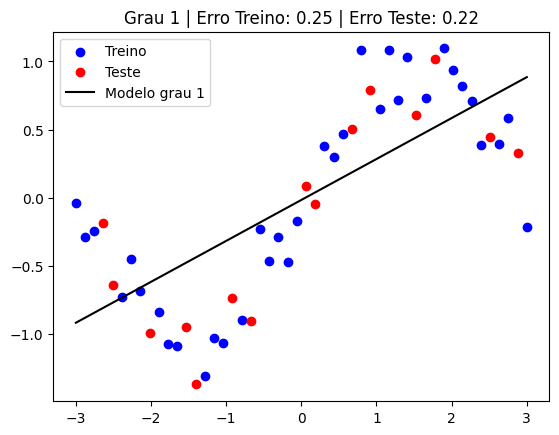

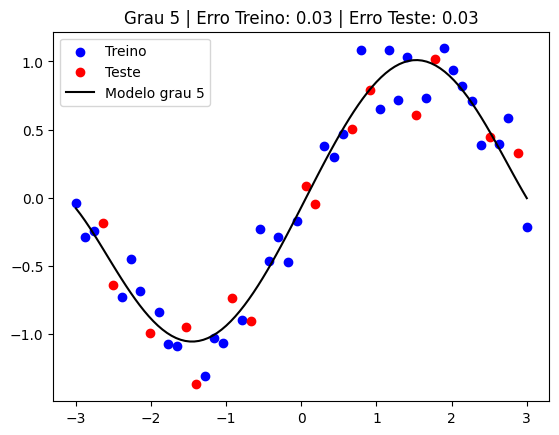

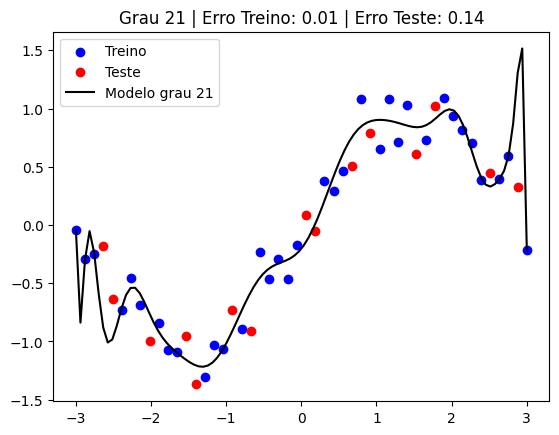

In [12]:
# Exemplos de Ajustes
plot_model(1)   # Underfitting
plot_model(5)   # Bom ajuste
plot_model(21)  # Overfitting

# Exemplo com Redes Neurais

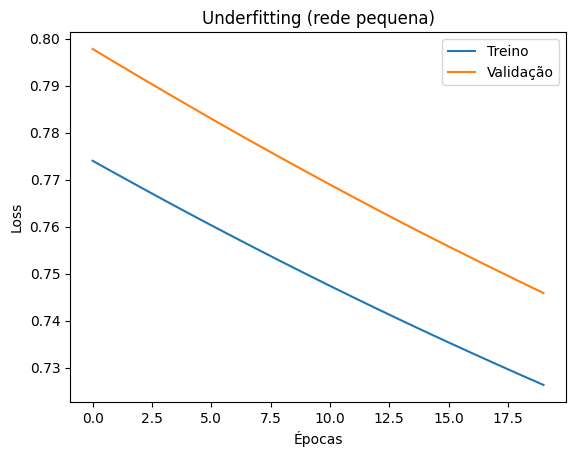

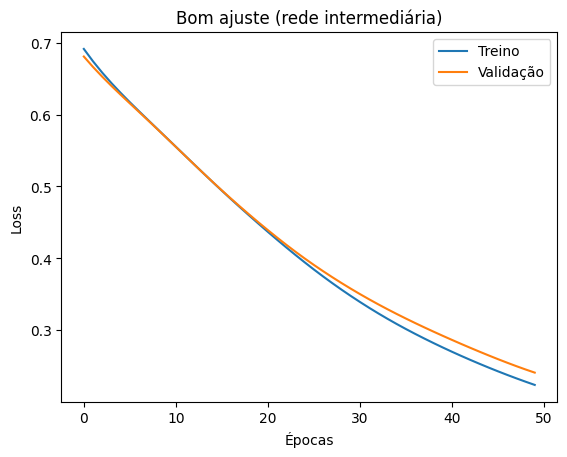

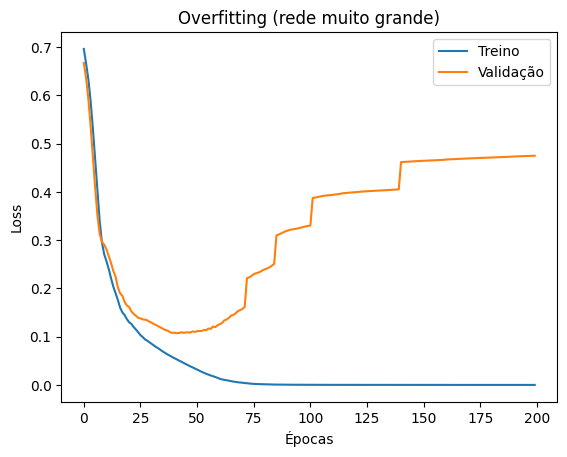

In [13]:
X, y = make_classification(
    n_samples=5000, n_features=20, n_informative=15, n_redundant=5,
    n_classes=2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Função para treinar modelos
def train_model(hidden_units=10, layers=1, epochs=50, lr=0.001):
    layers_list = []
    input_size = X_train.shape[1]
    output_size = 1

    # primeira camada
    layers_list.append(nn.Linear(input_size, hidden_units))
    layers_list.append(nn.ReLU())
    # camadas ocultas adicionais
    for _ in range(layers - 1):
        layers_list.append(nn.Linear(hidden_units, hidden_units))
        layers_list.append(nn.ReLU())
    # saída
    layers_list.append(nn.Linear(hidden_units, output_size))
    layers_list.append(nn.Sigmoid())

    model = nn.Sequential(*layers_list)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses = [], []

    for epoch in range(epochs):
        # treino
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        # validação
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_test)
            val_loss = criterion(y_val_pred, y_test)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

    return train_losses, val_losses

# Três cenários

train_under, val_under = train_model(hidden_units=1, layers=1, epochs=20)    # Underfitting
train_good, val_good   = train_model(hidden_units=64, layers=2, epochs=50)   # Bom ajuste
train_over, val_over   = train_model(hidden_units=256, layers=4, epochs=200) # Overfitting


# Plotar curvas

def plot_losses(train_losses, val_losses, title):
    plt.plot(train_losses, label="Treino")
    plt.plot(val_losses, label="Validação")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.show()

plot_losses(train_under, val_under, "Underfitting (rede pequena)")
plot_losses(train_good, val_good, "Bom ajuste (rede intermediária)")
plot_losses(train_over, val_over, "Overfitting (rede muito grande)")
